<a href="https://colab.research.google.com/github/radhikark0707/my-data-analysis/blob/main/Housepricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
data=pd.read_csv('/content/House_Pricing.csv')

In [76]:
data.dtypes

ID                                             int64
Date House was Sold                           object
Sale Price                                   float64
No of Bedrooms                                 int64
No of Bathrooms                              float64
Flat Area (in Sqft)                          float64
Lot Area (in Sqft)                           float64
No of Floors                                 float64
Waterfront View                               object
No of Times Visited                           object
Condition of the House                        object
Overall Grade                                  int64
Area of the House from Basement (in Sqft)    float64
Basement Area (in Sqft)                        int64
Age of House (in Years)                        int64
Renovated Year                                 int64
Zipcode                                      float64
Latitude                                     float64
Longitude                                    f

In [77]:
data['Zipcode']=data['Zipcode'].astype('str').str.strip().str.replace('.0','')
data['Zipcode']=data['Zipcode'].astype('object')

In [78]:
data['Date House was Sold']=pd.to_datetime(data['Date House was Sold'])

In [79]:
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,2017-10-14,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178,47.5112,-122.257,1340.0,5650
1,6414100192,2017-12-14,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125,47.7210,-122.319,1690.0,7639
2,5631500400,2016-02-15,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028,47.7379,-122.233,2720.0,8062
3,2487200875,2017-12-14,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,7,1050.0,910,53,0,98136,47.5208,-122.393,1360.0,5000
4,1954400510,2016-02-15,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,8,1680.0,0,31,0,98074,47.6168,-122.045,1800.0,7503


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   ID                                         21613 non-null  int64         
 1   Date House was Sold                        21613 non-null  datetime64[ns]
 2   Sale Price                                 21609 non-null  float64       
 3   No of Bedrooms                             21613 non-null  int64         
 4   No of Bathrooms                            21609 non-null  float64       
 5   Flat Area (in Sqft)                        21604 non-null  float64       
 6   Lot Area (in Sqft)                         21604 non-null  float64       
 7   No of Floors                               21613 non-null  float64       
 8   Waterfront View                            21613 non-null  object        
 9   No of Times Visit

In [81]:
data.describe()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.161300e+04,21613,2.160900e+04,21613.000000,21609.000000,21604.000000,2.160400e+04,21613.000000,21613.000000,21610.000000,21613.000000,21613.000000,21613.000000,21612.000000,21612.000000,21612.000000,21613.000000
mean,4.580302e+09,2017-03-05 23:14:37.638458112,5.401984e+05,3.370842,2.114732,2079.931772,1.510776e+04,1.494309,7.623467,1788.344193,291.509045,46.994864,84.402258,47.560048,-122.213892,1986.538914,12768.455652
min,1.000102e+06,2016-01-15 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,3.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,2016-04-15 00:00:00,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,21.000000,0.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,2017-06-14 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,7.000000,1560.000000,0.000000,43.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,2017-09-14 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,8.000000,2210.000000,560.000000,67.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,2017-12-14 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,118.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000
std,2.876566e+09,NaN,3.673890e+05,0.930062,0.770138,918.487597,4.142827e+04,0.539989,1.105439,827.982604,442.575043,29.373411,401.679240,0.138565,0.140830,685.404255,27304.179631


In [82]:
data.isnull().sum()

ID                                               0
Date House was Sold                              0
Sale Price                                       4
No of Bedrooms                                   0
No of Bathrooms                                  4
Flat Area (in Sqft)                              9
Lot Area (in Sqft)                               9
No of Floors                                     0
Waterfront View                                  0
No of Times Visited                          19489
Condition of the House                           0
Overall Grade                                    0
Area of the House from Basement (in Sqft)        3
Basement Area (in Sqft)                          0
Age of House (in Years)                          0
Renovated Year                                   0
Zipcode                                          0
Latitude                                         1
Longitude                                        1
Living Area after Renovation (i

In [83]:
missing_value_percent=(data.isnull().sum()/len(data))*100
missing_value_percent

ID                                            0.000000
Date House was Sold                           0.000000
Sale Price                                    0.018507
No of Bedrooms                                0.000000
No of Bathrooms                               0.018507
Flat Area (in Sqft)                           0.041642
Lot Area (in Sqft)                            0.041642
No of Floors                                  0.000000
Waterfront View                               0.000000
No of Times Visited                          90.172581
Condition of the House                        0.000000
Overall Grade                                 0.000000
Area of the House from Basement (in Sqft)     0.013881
Basement Area (in Sqft)                       0.000000
Age of House (in Years)                       0.000000
Renovated Year                                0.000000
Zipcode                                       0.000000
Latitude                                      0.004627
Longitude 

In [84]:
data.dtypes

ID                                                    int64
Date House was Sold                          datetime64[ns]
Sale Price                                          float64
No of Bedrooms                                        int64
No of Bathrooms                                     float64
Flat Area (in Sqft)                                 float64
Lot Area (in Sqft)                                  float64
No of Floors                                        float64
Waterfront View                                      object
No of Times Visited                                  object
Condition of the House                               object
Overall Grade                                         int64
Area of the House from Basement (in Sqft)           float64
Basement Area (in Sqft)                               int64
Age of House (in Years)                               int64
Renovated Year                                        int64
Zipcode                                 

In [85]:
data.drop(columns=['No of Times Visited'],inplace=True)

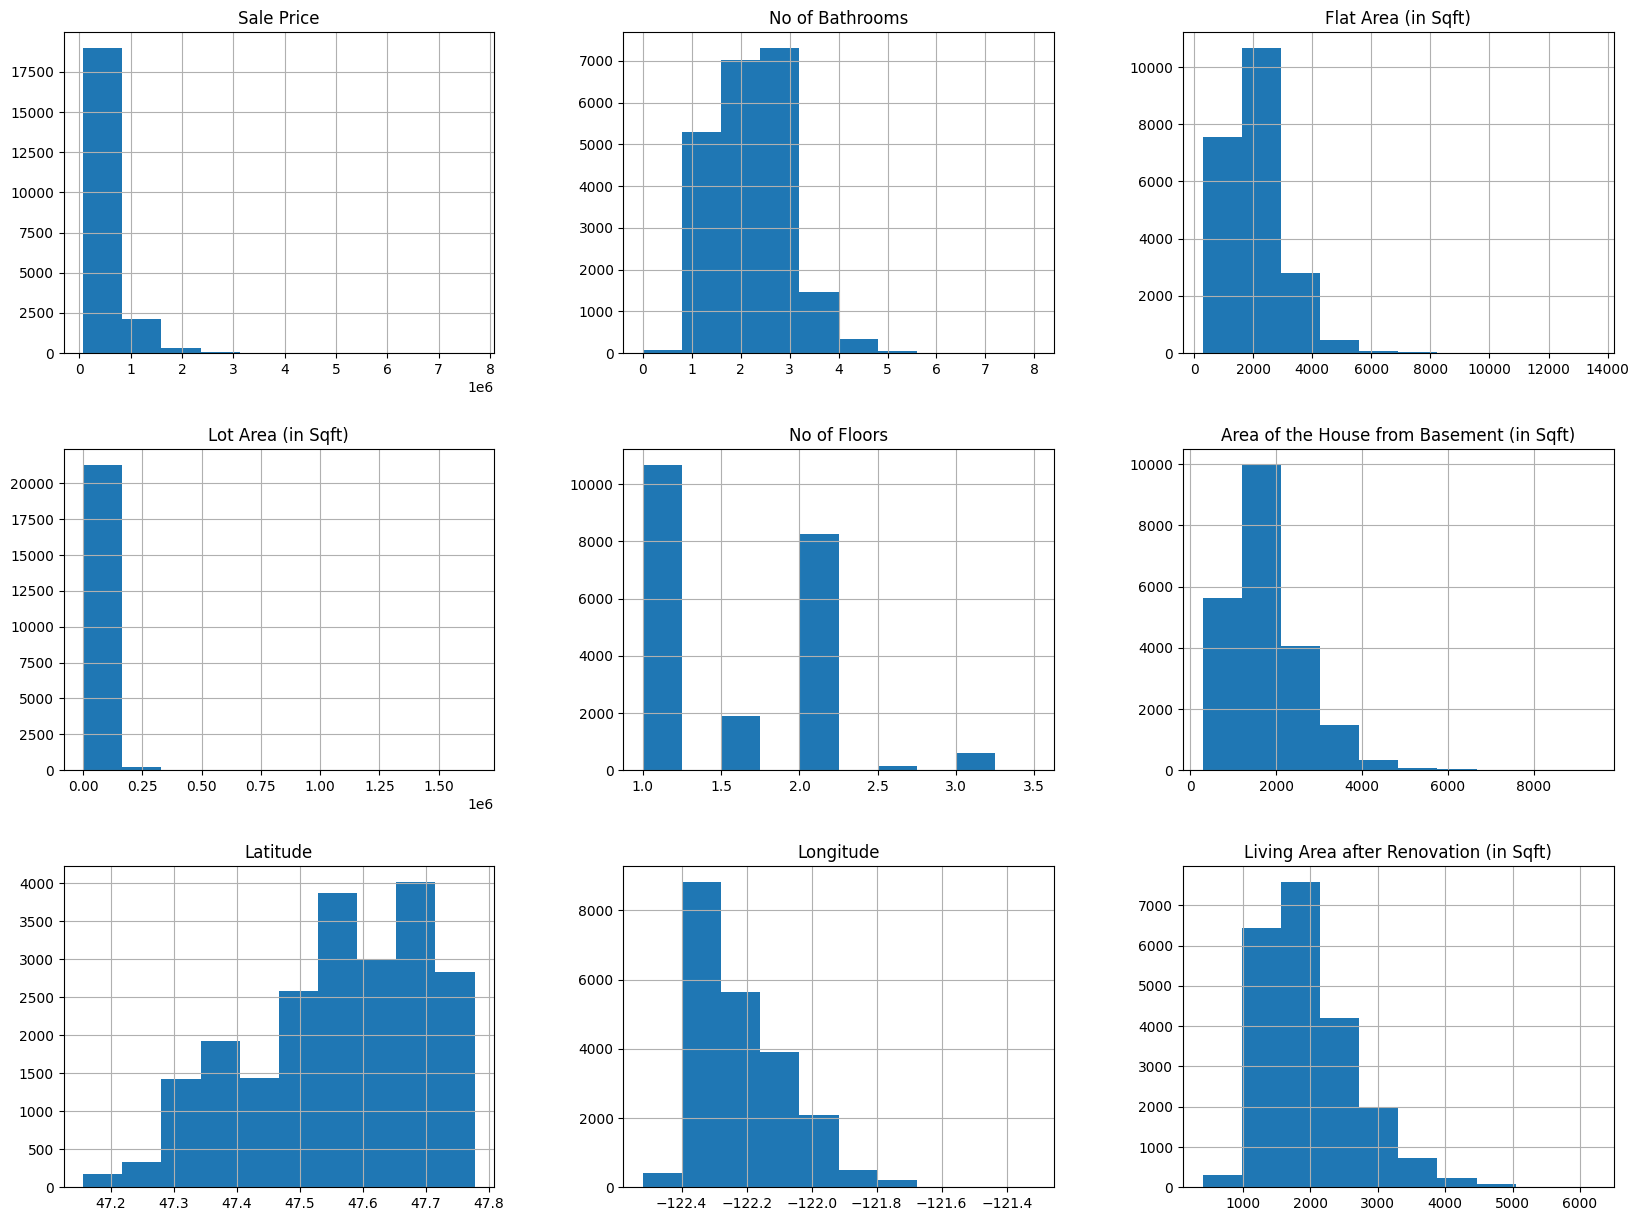

In [86]:
graph=data.select_dtypes(include=['float'])
graph.hist(figsize=(20,15))
plt.show()

In [87]:
for i in ['Sale Price','No of Bathrooms','Flat Area (in Sqft)','Lot Area (in Sqft)','Area of the House from Basement (in Sqft)','Latitude','Longitude','Living Area after Renovation (in Sqft)']:
  data[i]=data[i].fillna(data[i].median())



In [88]:
data['Zipcode'].mode()[0]
data['Zipcode']=data['Zipcode'].fillna(data['Zipcode'].mode()[0])


In [89]:
data.isnull().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Waterfront View                              0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      0
Latitude                                     0
Longitude                                    0
Living Area after Renovation (in Sqft)       0
Lot Area after Renovation (in Sqft)          0
dtype: int64

In [90]:
data.dtypes

ID                                                    int64
Date House was Sold                          datetime64[ns]
Sale Price                                          float64
No of Bedrooms                                        int64
No of Bathrooms                                     float64
Flat Area (in Sqft)                                 float64
Lot Area (in Sqft)                                  float64
No of Floors                                        float64
Waterfront View                                      object
Condition of the House                               object
Overall Grade                                         int64
Area of the House from Basement (in Sqft)           float64
Basement Area (in Sqft)                               int64
Age of House (in Years)                               int64
Renovated Year                                        int64
Zipcode                                              object
Latitude                                

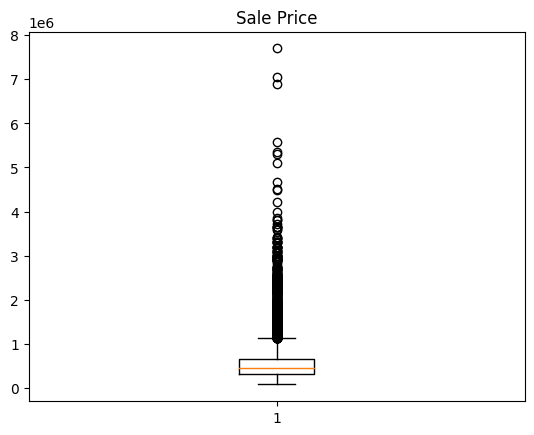

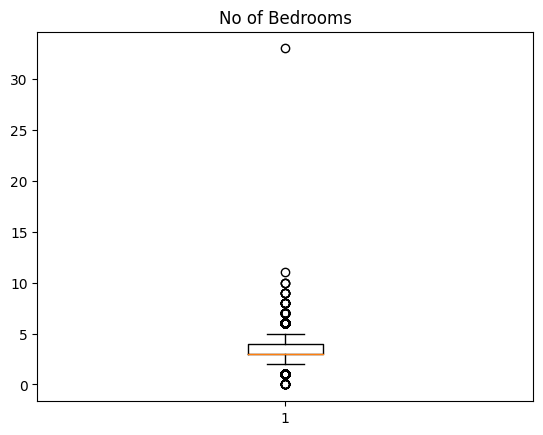

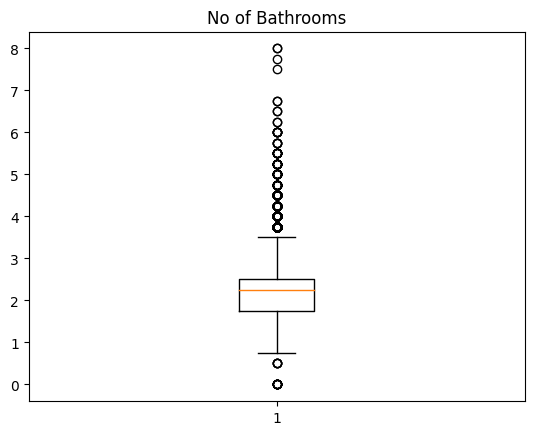

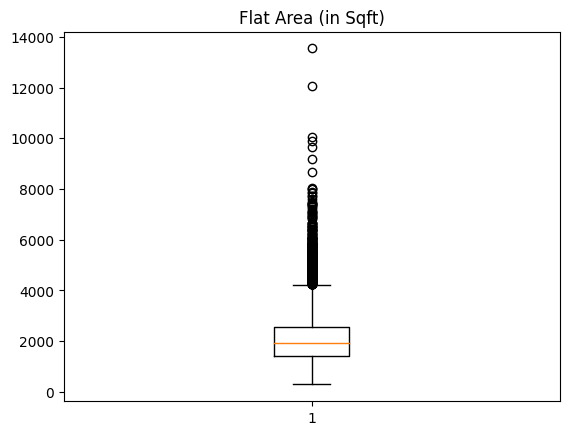

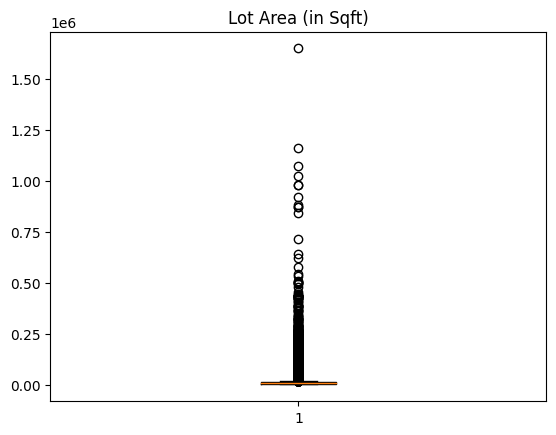

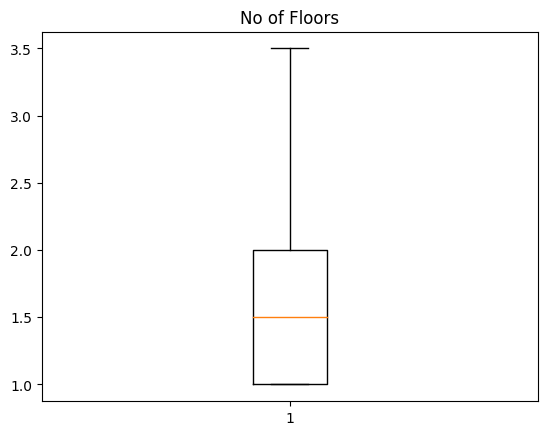

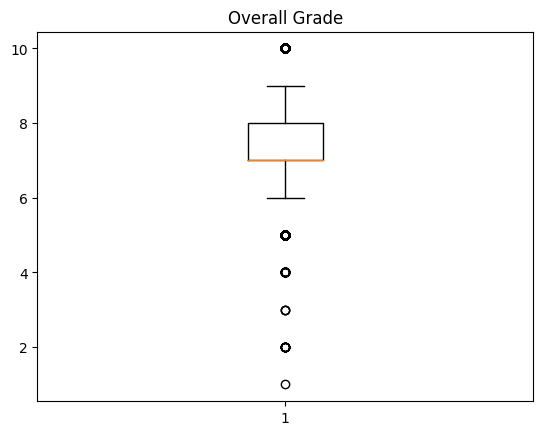

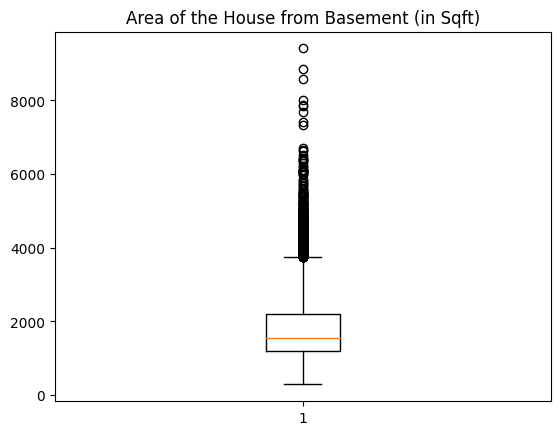

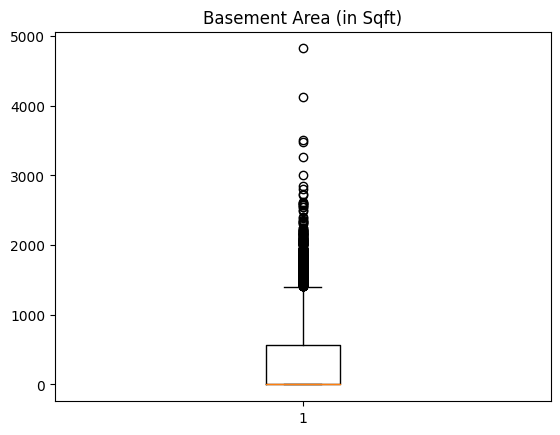

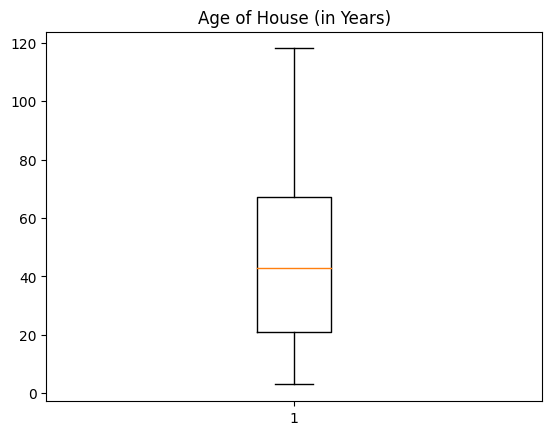

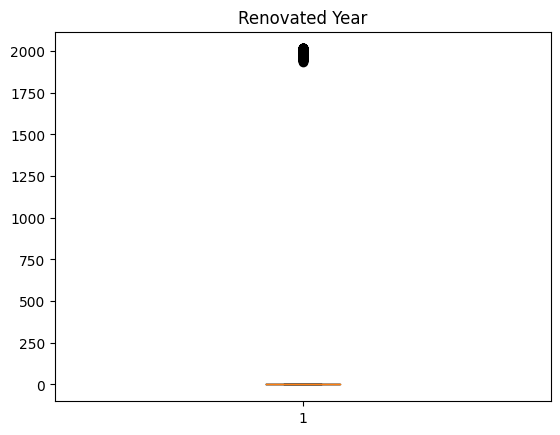

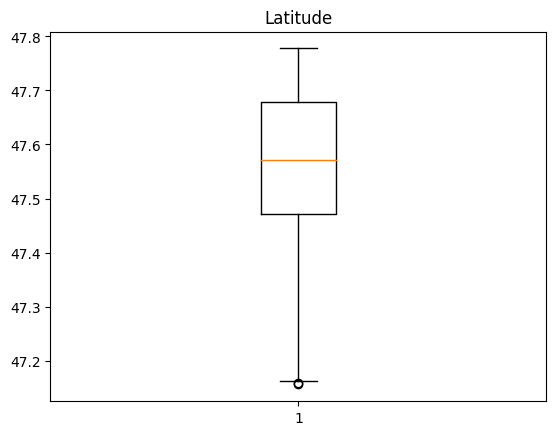

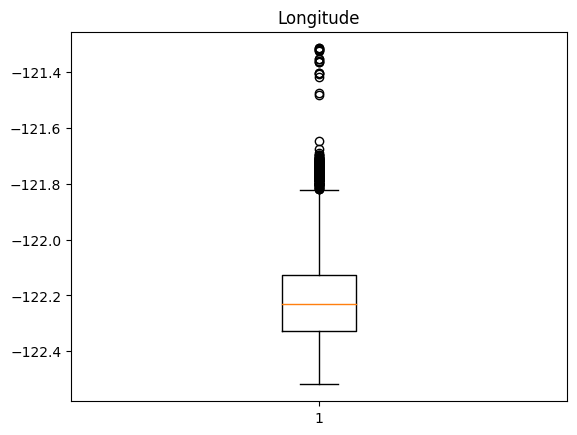

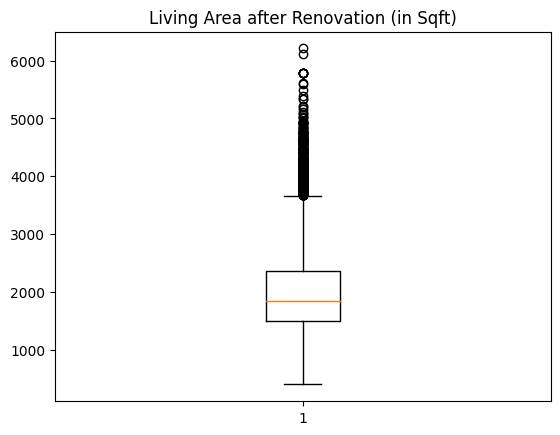

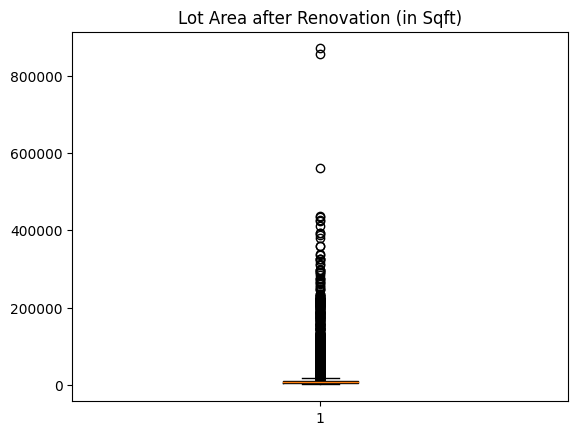

In [91]:
for i in ['Sale Price','No of Bedrooms','No of Bathrooms','Flat Area (in Sqft)','Lot Area (in Sqft)','No of Floors','Overall Grade','Area of the House from Basement (in Sqft)','Basement Area (in Sqft)','Age of House (in Years)','Renovated Year','Latitude','Longitude','Living Area after Renovation (in Sqft)','Lot Area after Renovation (in Sqft)']:
  plt.figure()
  plt.boxplot(data[i])
  plt.title(i)

i:No of Bedrooms
Q1:3.0
Q3:4.0
IQR:1.0
lower_bound:1.5
upper_bound:5.5
outlier:546
Outlier indices:[154, 209, 232, 239, 264, 331, 350, 465, 486, 527, 556, 558, 648, 717, 718, 784, 833, 860, 875, 903, 1066, 1135, 1149, 1162, 1163, 1195, 1228, 1241, 1266, 1306, 1315, 1378, 1389, 1413, 1457, 1478, 1503, 1535, 1539, 1595, 1629, 1653, 1660, 1674, 1712, 1718, 1734, 1752, 1882, 1931, 1956, 1971, 1975, 1986, 2008, 2026, 2031, 2070, 2074, 2156, 2306, 2310, 2345, 2366, 2382, 2411, 2496, 2497, 2516, 2567, 2629, 2653, 2668, 2671, 2687, 2709, 2727, 2825, 2852, 2906, 2927, 2930, 2973, 3042, 3079, 3108, 3119, 3152, 3223, 3235, 3253, 3285, 3303, 3338, 3383, 3467, 3489, 3523, 3540, 3541, 3582, 3602, 3613, 3648, 3661, 3720, 3721, 3725, 3745, 3776, 3805, 3837, 3874, 3925, 3936, 3984, 3987, 4024, 4035, 4067, 4089, 4096, 4107, 4146, 4197, 4235, 4240, 4255, 4344, 4390, 4410, 4446, 4581, 4598, 4639, 4651, 4654, 4657, 4701, 4717, 4760, 4832, 4867, 4868, 4890, 5049, 5135, 5138, 5160, 5165, 5168, 5210, 5320, 53

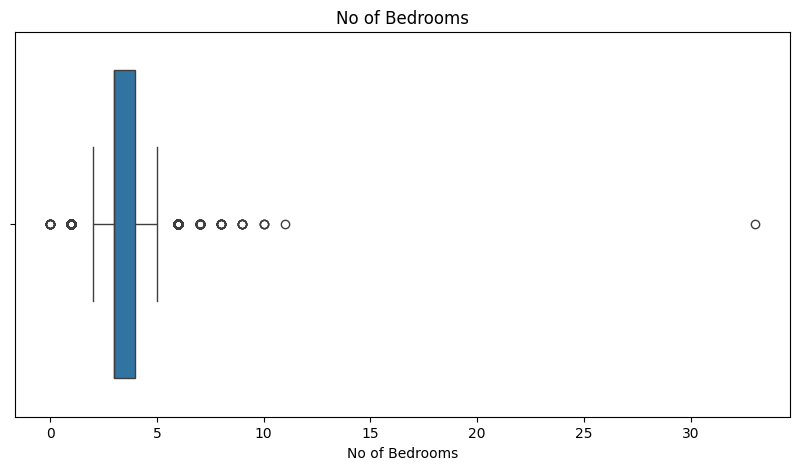

i:No of Bathrooms
Q1:1.75
Q3:2.5
IQR:0.75
lower_bound:0.625
upper_bound:3.625
outlier:571
Outlier indices:[5, 75, 235, 270, 300, 419, 450, 471, 509, 527, 571, 577, 779, 814, 875, 1031, 1055, 1100, 1117, 1122, 1133, 1149, 1163, 1164, 1171, 1199, 1247, 1261, 1294, 1315, 1333, 1361, 1396, 1413, 1420, 1436, 1448, 1530, 1535, 1557, 1660, 1730, 1752, 1763, 1807, 1848, 1882, 1886, 1894, 1921, 1926, 1931, 1944, 1945, 1987, 2020, 2040, 2085, 2113, 2125, 2142, 2200, 2236, 2248, 2261, 2267, 2345, 2461, 2620, 2626, 2644, 2652, 2668, 2790, 2818, 2845, 2884, 3020, 3039, 3100, 3119, 3121, 3204, 3237, 3252, 3256, 3257, 3258, 3281, 3317, 3378, 3384, 3407, 3476, 3514, 3519, 3535, 3586, 3615, 3641, 3708, 3721, 3725, 3726, 3748, 3759, 3769, 3777, 3813, 3821, 3871, 3914, 3924, 4024, 4035, 4096, 4149, 4255, 4272, 4314, 4316, 4344, 4411, 4468, 4474, 4486, 4581, 4598, 4696, 4699, 4701, 4811, 4859, 4917, 5024, 5025, 5063, 5094, 5117, 5210, 5223, 5304, 5412, 5449, 5460, 5561, 5645, 5702, 5747, 5832, 5850, 5880,

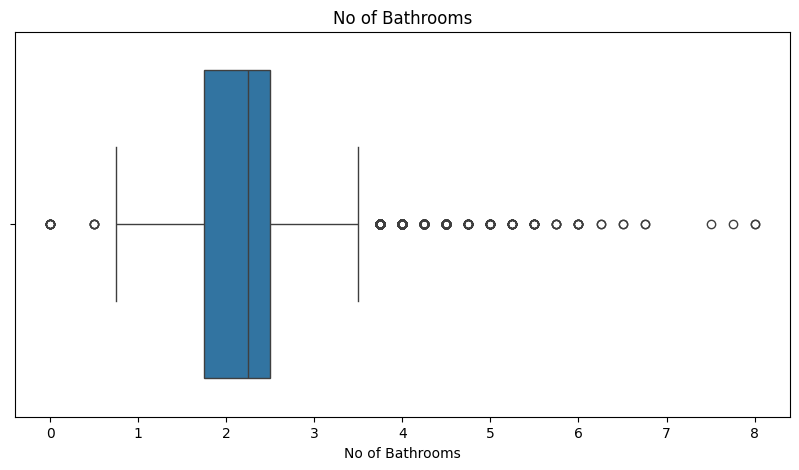

In [92]:
for i in ['No of Bedrooms','No of Bathrooms']:
  Q1=data[i].quantile(0.25)
  Q3=data[i].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  outlier=data[(data[i]<lower_bound)| (data[i]>upper_bound)]
  print(f'i:{i}')
  print(f'Q1:{Q1}')
  print(f'Q3:{Q3}')
  print(f'IQR:{IQR}')
  print(f'lower_bound:{lower_bound}')
  print(f'upper_bound:{upper_bound}')
  print(f'outlier:{outlier.shape[0]}')
  print(f'Outlier indices:{outlier.index.tolist()}')
  print()
  plt.figure(figsize=(10,5))
  sns.boxplot(x=data[i])
  plt.title(i)
  plt.xlabel(i)
  plt.show()



In [93]:
data.dtypes

ID                                                    int64
Date House was Sold                          datetime64[ns]
Sale Price                                          float64
No of Bedrooms                                        int64
No of Bathrooms                                     float64
Flat Area (in Sqft)                                 float64
Lot Area (in Sqft)                                  float64
No of Floors                                        float64
Waterfront View                                      object
Condition of the House                               object
Overall Grade                                         int64
Area of the House from Basement (in Sqft)           float64
Basement Area (in Sqft)                               int64
Age of House (in Years)                               int64
Renovated Year                                        int64
Zipcode                                              object
Latitude                                

In [94]:
data2=data.copy()

In [95]:
cc=['Waterfront View','Condition of the House','Zipcode']
data2=pd.get_dummies(data2,columns=cc,drop_first=True)


In [96]:
data2.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),...,Zipcode_98148,Zipcode_98155,Zipcode_98166,Zipcode_98168,Zipcode_98177,Zipcode_98178,Zipcode_98188,Zipcode_98198,Zipcode_98199,Zipcode_nan
0,7129300520,2017-10-14,221900.0,3,1.00,1180.0,5650.0,1.0,7,1180.0,...,False,False,False,False,False,True,False,False,False,False
1,6414100192,2017-12-14,538000.0,3,2.25,2570.0,7242.0,2.0,7,2170.0,...,False,False,False,False,False,False,False,False,False,False
2,5631500400,2016-02-15,180000.0,2,1.00,770.0,10000.0,1.0,6,770.0,...,False,False,False,False,False,False,False,False,False,False
3,2487200875,2017-12-14,604000.0,4,3.00,1960.0,5000.0,1.0,7,1050.0,...,False,False,False,False,False,False,False,False,False,False
4,1954400510,2016-02-15,510000.0,3,2.00,1680.0,8080.0,1.0,8,1680.0,...,False,False,False,False,False,False,False,False,False,False


In [97]:
for i in ['Zipcode_98148','Zipcode_98155','Zipcode_98166','Zipcode_98168','Zipcode_98177','Zipcode_98178','Zipcode_98188','Zipcode_98198','Zipcode_98199','Zipcode_nan']:
  data2[i]=data2[i].astype('int64')

In [98]:
data2.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),...,Zipcode_98148,Zipcode_98155,Zipcode_98166,Zipcode_98168,Zipcode_98177,Zipcode_98178,Zipcode_98188,Zipcode_98198,Zipcode_98199,Zipcode_nan
0,7129300520,2017-10-14,221900.0,3,1.00,1180.0,5650.0,1.0,7,1180.0,...,0,0,0,0,0,1,0,0,0,0
1,6414100192,2017-12-14,538000.0,3,2.25,2570.0,7242.0,2.0,7,2170.0,...,0,0,0,0,0,0,0,0,0,0
2,5631500400,2016-02-15,180000.0,2,1.00,770.0,10000.0,1.0,6,770.0,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,2017-12-14,604000.0,4,3.00,1960.0,5000.0,1.0,7,1050.0,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,2016-02-15,510000.0,3,2.00,1680.0,8080.0,1.0,8,1680.0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
nc=['Sale Price','No of Bedrooms','No of Bathrooms','Flat Area (in Sqft)','Lot Area (in Sqft)','No of Floors','Overall Grade','Area of the House from Basement (in Sqft)','Basement Area (in Sqft)','Age of House (in Years)','Renovated Year','Latitude','Longitude','Living Area after Renovation (in Sqft)','Lot Area after Renovation (in Sqft)']
data2[nc]=sc.fit_transform(data2[nc])


In [100]:
data2.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),...,Zipcode_98148,Zipcode_98155,Zipcode_98166,Zipcode_98168,Zipcode_98177,Zipcode_98178,Zipcode_98188,Zipcode_98198,Zipcode_98199,Zipcode_nan
0,7129300520,2017-10-14,-0.866430,-0.398737,-1.447640,-0.979940,-0.228268,-0.915427,-0.564013,-0.734756,...,0,0,0,0,0,1,0,0,0,0
1,6414100192,2017-12-14,-0.005939,-0.398737,0.175628,0.533757,-0.189832,0.936506,-0.564013,0.461025,...,0,0,0,0,0,0,0,0,0,0
2,5631500400,2016-02-15,-0.980490,-1.473959,-1.447640,-1.426426,-0.123244,-0.915427,-1.468651,-1.229979,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,2017-12-14,0.173727,0.676485,1.149589,-0.130528,-0.243962,-0.915427,-0.564013,-0.891778,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,2016-02-15,-0.082161,-0.398737,-0.149026,-0.435445,-0.169600,-0.915427,0.340626,-0.130826,...,0,0,0,0,0,0,0,0,0,0
